In [1]:
#Importing libraries 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data = pd.read_csv('../treated.csv')
data.head()

,Unnamed: 0,Country,Year,fertility,Code,avg_years_of_schooling
0,0,Afghanistan,2007,6.56,AFG,2.9
1,1,Afghanistan,1995,7.61,AFG,1.9
2,2,Afghanistan,2008,6.37,AFG,3.0
3,3,Afghanistan,2017,4.63,AFG,3.8
4,4,Afghanistan,1994,7.57,AFG,1.8


In [3]:
data

,Unnamed: 0,Country,Year,fertility,Code,avg_years_of_schooling
0,0,Afghanistan,2007,6.56,AFG,2.9
1,1,Afghanistan,1995,7.61,AFG,1.9
2,2,Afghanistan,2008,6.37,AFG,3.0
3,3,Afghanistan,2017,4.63,AFG,3.8
4,4,Afghanistan,1994,7.57,AFG,1.8
...,...,...,...,...,...,...
5121,5121,Zimbabwe,2010,4.03,ZWE,7.3
5122,5122,Zimbabwe,2000,3.75,ZWE,6.5
5123,5123,Zimbabwe,2017,3.71,ZWE,8.2
5124,5124,Zimbabwe,2002,3.72,ZWE,6.9


In [4]:
def preproc(data:pd.DataFrame) -> pd.DataFrame:
    '''
    Fines adjustments on dataset
    '''
    #Removing columns
    data.drop(columns=['Unnamed: 0', 'Code'], inplace=True)

    #Ordering by year and set it as index
    data.sort_values('Year', inplace=True)
    data.set_index('Year', inplace=True)
    
    return data

In [5]:
df = preproc(data)
df.head()

,Country,fertility,avg_years_of_schooling
Year,,,
1960,Germany,2.37,7.53
1960,Thailand,6.15,2.07
1960,Kazakhstan,4.56,3.07
1960,Vietnam,6.35,2.01
1960,Kenya,7.95,1.21


In [6]:
def list_X_y(data:pd.DataFrame) -> list:
    '''
    Given a countries dataset, this function returns
    two lists of dataframes, ie., lists containing one dataframe per country.
    '''
    countries = data.Country.unique().tolist()

    X = []
    y = []
    
    new_df = pd.DataFrame()

    for country in countries:
        new_df = data[data['Country']==country][['fertility', 'avg_years_of_schooling']]
        
        if new_df.shape[0] == 34: #Considering only countries that has 34 samples (34 is the max number of samples)
            X.append(new_df.head(33))
            y.append(new_df['avg_years_of_schooling'].tail(1))
        else:
            pass
    
    #Transforming X to a numpy array
    X = np.array(X)
    #Transforming y to a numpy array and adding one dimension
    y = np.array(y)
    y = np.expand_dims(y.astype(np.float32), axis=-1)

    return X, y

In [7]:
X, y = list_X_y(df)

In [8]:
#Splits into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [24]:
y_train.shape

(105, 1, 1)

In [25]:
X_train

array([[[ 2.37,  7.53],
        [ 2.5 ,  7.68],
        [ 2.03,  7.71],
        ...,
        [ 1.47, 14.  ],
        [ 1.5 , 14.1 ],
        [ 1.6 , 14.1 ]],

       [[ 6.15,  2.07],
        [ 6.13,  1.89],
        [ 5.6 ,  1.87],
        ...,
        [ 1.54,  7.6 ],
        [ 1.54,  7.6 ],
        [ 1.54,  7.6 ]],

       [[ 4.56,  3.07],
        [ 4.05,  3.93],
        [ 3.61,  4.46],
        ...,
        [ 2.73, 11.7 ],
        [ 2.74, 11.7 ],
        [ 2.77, 11.7 ]],

       ...,

       [[ 5.87,  4.26],
        [ 5.64,  4.38],
        [ 5.17,  4.69],
        ...,
        [ 2.56,  9.9 ],
        [ 2.54,  9.9 ],
        [ 2.51, 10.  ]],

       [[ 1.98,  6.6 ],
        [ 1.88,  6.96],
        [ 2.17,  7.25],
        ...,
        [ 1.54, 12.6 ],
        [ 1.58, 12.7 ],
        [ 1.6 , 12.6 ]],

       [[ 7.52,  0.72],
        [ 7.68,  0.64],
        [ 7.64,  0.78],
        ...,
        [ 3.02,  7.9 ],
        [ 3.04,  7.9 ],
        [ 3.05,  8.  ]]])

In [9]:
X_train.shape

(105, 33, 2)

In [10]:
model = Sequential()
model.add(SimpleRNN(units=20, activation='tanh'))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="linear"))

In [11]:
model.compile(loss='mse', 
              optimizer='adam', #change to adam
                metrics=['mae'])

In [12]:
es = EarlyStopping(patience=15, monitor = 'val_loss')

history = model.fit(X_train, y_train,
    validation_split = 0.2,
    callbacks=[es],
    epochs=1000,
    verbose=1)

Epoch 1/1000


2023-06-13 16:29:12.266996: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


3/3 [==============================] - 1s 98ms/step - loss: 78.4277 - mae: 8.3982 - val_loss: 65.3681 - val_mae: 7.6958
Epoch 2/1000
3/3 [==============================] - 0s 10ms/step - loss: 75.2521 - mae: 8.2089 - val_loss: 62.7421 - val_mae: 7.5209
Epoch 3/1000
3/3 [==============================] - 0s 10ms/step - loss: 72.7565 - mae: 8.0497 - val_loss: 60.9553 - val_mae: 7.3928
Epoch 4/1000
3/3 [==============================] - 0s 10ms/step - loss: 70.8526 - mae: 7.9220 - val_loss: 59.1540 - val_mae: 7.2646
Epoch 5/1000
3/3 [==============================] - 0s 10ms/step - loss: 68.9007 - mae: 7.7922 - val_loss: 57.3139 - val_mae: 7.1343
Epoch 6/1000
3/3 [==============================] - 0s 10ms/step - loss: 66.9146 - mae: 7.6626 - val_loss: 55.4650 - val_mae: 7.0023
Epoch 7/1000
3/3 [==============================] - 0s 9ms/step - loss: 64.8706 - mae: 7.5297 - val_loss: 53.5875 - val_mae: 6.8673
Epoch 8/1000
3/3 [==============================] - 0s 10ms/step - loss: 62.8476 - 

3/3 [==============================] - 0s 10ms/step - loss: 5.8476 - mae: 1.8985 - val_loss: 3.4702 - val_mae: 1.3752
Epoch 63/1000
3/3 [==============================] - 0s 10ms/step - loss: 5.5802 - mae: 1.8525 - val_loss: 3.3131 - val_mae: 1.3355
Epoch 64/1000
3/3 [==============================] - 0s 9ms/step - loss: 5.3558 - mae: 1.8150 - val_loss: 3.1628 - val_mae: 1.2961
Epoch 65/1000
3/3 [==============================] - 0s 10ms/step - loss: 5.1444 - mae: 1.7823 - val_loss: 3.0208 - val_mae: 1.2604
Epoch 66/1000
3/3 [==============================] - 0s 10ms/step - loss: 4.9124 - mae: 1.7413 - val_loss: 2.8842 - val_mae: 1.2271
Epoch 67/1000
3/3 [==============================] - 0s 10ms/step - loss: 4.7075 - mae: 1.7055 - val_loss: 2.7525 - val_mae: 1.1985
Epoch 68/1000
3/3 [==============================] - 0s 10ms/step - loss: 4.4957 - mae: 1.6684 - val_loss: 2.6267 - val_mae: 1.1728
Epoch 69/1000
3/3 [==============================] - 0s 10ms/step - loss: 4.3187 - mae: 1.6

3/3 [==============================] - 0s 10ms/step - loss: 0.5233 - mae: 0.5498 - val_loss: 0.3076 - val_mae: 0.4289
Epoch 125/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.5101 - mae: 0.5423 - val_loss: 0.2993 - val_mae: 0.4211
Epoch 126/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.4973 - mae: 0.5366 - val_loss: 0.2955 - val_mae: 0.4193
Epoch 127/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.4848 - mae: 0.5308 - val_loss: 0.2905 - val_mae: 0.4159
Epoch 128/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.4721 - mae: 0.5239 - val_loss: 0.2777 - val_mae: 0.4028
Epoch 129/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.4608 - mae: 0.5163 - val_loss: 0.2715 - val_mae: 0.3969
Epoch 130/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.4501 - mae: 0.5110 - val_loss: 0.2713 - val_mae: 0.3977
Epoch 131/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.4384 - 

Epoch 186/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.1361 - mae: 0.2565 - val_loss: 0.0647 - val_mae: 0.2048
Epoch 187/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.1330 - mae: 0.2523 - val_loss: 0.0631 - val_mae: 0.2026
Epoch 188/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.1301 - mae: 0.2485 - val_loss: 0.0620 - val_mae: 0.2003
Epoch 189/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.1273 - mae: 0.2450 - val_loss: 0.0613 - val_mae: 0.1982
Epoch 190/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.1250 - mae: 0.2428 - val_loss: 0.0600 - val_mae: 0.1971
Epoch 191/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.1221 - mae: 0.2395 - val_loss: 0.0595 - val_mae: 0.1952
Epoch 192/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.1194 - mae: 0.2361 - val_loss: 0.0573 - val_mae: 0.1937
Epoch 193/1000
3/3 [==============================] - 0s 11ms/step - 

3/3 [==============================] - 0s 11ms/step - loss: 0.0498 - mae: 0.1460 - val_loss: 0.0261 - val_mae: 0.1222
Epoch 248/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0491 - mae: 0.1448 - val_loss: 0.0260 - val_mae: 0.1218
Epoch 249/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0485 - mae: 0.1440 - val_loss: 0.0265 - val_mae: 0.1231
Epoch 250/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0477 - mae: 0.1434 - val_loss: 0.0276 - val_mae: 0.1261
Epoch 251/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0476 - mae: 0.1438 - val_loss: 0.0273 - val_mae: 0.1249
Epoch 252/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0469 - mae: 0.1427 - val_loss: 0.0268 - val_mae: 0.1233
Epoch 253/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0466 - mae: 0.1419 - val_loss: 0.0259 - val_mae: 0.1209
Epoch 254/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0461 - 

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 20)                460       
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 15ms/step - loss: 0.0241 - mae: 0.1118


[0.02408645860850811, 0.11180389672517776]

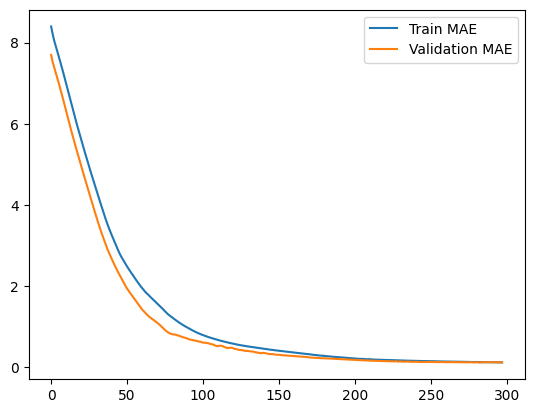

In [15]:
plt.plot(history.history["mae"], label = "Train MAE")
plt.plot(history.history["val_mae"], label = "Validation MAE")
plt.legend()

In [27]:
pred = model.predict([[[2.37,7.53]]])

1/1 [==============================] - 0s 27ms/step


In [28]:
print(f"✅ Model trained on {len(X_train)} rows with min val MAE: {round(np.min(history.history['val_mae']), 2)}")


✅ Model trained on 105 rows with min val MAE: 0.11


In [29]:
history.params

{'verbose': 1, 'epochs': 1000, 'steps': 3}

In [30]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [31]:
pred

array([[9.7484045]], dtype=float32)

In [21]:
pred[0][0]

6.442767

In [22]:
[[[[float(2.37),float(7.53)]]]]

[[[[2.37, 7.53]]]]

In [23]:
from ..fertility.ml_logic.registry import load_model

ImportError: attempted relative import with no known parent package

In [ ]:
app.state.model = load_model()

def predict(value1:float, value2:float):

    model = app.state.model
    assert model is not None

    pred = model.predict([[[value1, value2]]])
    print(pred)
    #return int(pred[0])
    return 'hello'

In [ ]:
model.predict()